#MAKING CUSTOM LOSS FUNCTION
Sometiems, we have to make our own custom loss function. Here in this tutorial , i am making a charbonnier loss function which is considered good for edge detection task. 
While making a loss function something should be kept in mind-

*   Custom Loss functions are defined using a custom class too. They inherit from torch.nn.Module just like the custom model.
*   The value finally being returned by a loss function MUST BE a scalar value. Not a vector/tensor.
*   The value being returned must be a Variable. So, that it can be used to update the parameters. The best way to do so is to just make sure that both x and y being passed in are Variables. That way any function of the two will also be a Variable.
*   It is important that gradient is kept True in the parameters. Otherwise pytorch will not be able to track the gradient while back-propagating.

After this, everything is just like making a custom model or dataloader. As it is also inherited from torch.nn.module, it also consists one init and forward function.
##Charbonnier loss function formula
Here I' denotes the predicted image

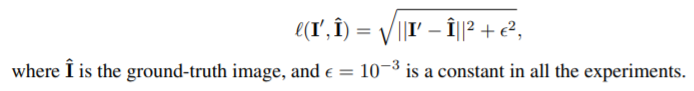



In [6]:
import torch
from torch import nn

In [7]:
#constructing the loss function
class CharbonnierLoss(nn.Module):
    """Charbonnier Loss (L1)"""

    def __init__(self, eps=1e-3):
        super(CharbonnierLoss, self).__init__()
        self.eps = eps #initialising epsilon

    def forward(self, x, y):
        diff = x - y   # x = predicted iimage and y = ground truth
        loss = torch.mean(torch.sqrt((diff * diff) + (self.eps*self.eps))) #executing the formula
        return loss

In [10]:
#declaring the loss function
criterion = CharbonnierLoss()
if torch.cuda.is_available():
    criterion = criterion.cuda()

In [8]:
#alternative method for declaring loss function, this one is more flexible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = CharbonnierLoss().to(device)